In [198]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

## Read in grid

In [184]:
grid = gpd.read_file('../data/interim/square_grid.geojson')

In [185]:
grid['centroid'] = grid.geometry.centroid

In [186]:
grid.head()

,geometry,centroid
0,"POLYGON ((-78.919453 42.826039, -78.919453 42....",POINT (-78.91765636943175 42.82735665851042)
1,"POLYGON ((-78.919453 42.82867431702084, -78.91...",POINT (-78.91765636943175 42.82999191935585)
2,"POLYGON ((-78.919453 42.83130952169087, -78.91...",POINT (-78.91765636943177 42.83262706785007)
3,"POLYGON ((-78.919453 42.83394461400928, -78.91...",POINT (-78.91765636943177 42.83526210399228)
4,"POLYGON ((-78.919453 42.83657959397529, -78.91...",POINT (-78.91765636943175 42.8378970277817)


## Read in store locations

In [188]:
df = pd.read_csv('../data/raw/store_locations.csv')
df.head()

,id,type,store_name,shop_type,store_lat,store_lon,full_address,produce,price
0,264775884,node,NaN,convenience,42.899507,-78.878870,NaN,False,2
1,265837170,node,Holly Farms,convenience,42.899564,-78.878780,NaN,False,3
2,414392643,node,Lexington Co-op,organic,42.919124,-78.876707,NaN,True,3
3,566210891,node,Dash's Market,supermarket,42.947850,-78.842669,NaN,True,3
4,629520975,node,Save-a-Lot,supermarket,42.958737,-78.878993,NaN,True,2


In [189]:
# create stores geodataframe
geometry = [Point(xy) for xy in zip(df['store_lon'], df['store_lat'])]
df = df.drop(['store_lon', 'store_lat'], axis=1)
crs = {'init': 'epsg:4326'}
stores = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [190]:
stores.head()

,id,type,store_name,shop_type,full_address,produce,price,geometry
0,264775884,node,NaN,convenience,NaN,False,2,POINT (-78.87887009999999 42.8995073)
1,265837170,node,Holly Farms,convenience,NaN,False,3,POINT (-78.87877979999999 42.8995639)
2,414392643,node,Lexington Co-op,organic,NaN,True,3,POINT (-78.8767071 42.91912429999999)
3,566210891,node,Dash's Market,supermarket,NaN,True,3,POINT (-78.8426688 42.9478503)
4,629520975,node,Save-a-Lot,supermarket,NaN,True,2,POINT (-78.87899279999999 42.9587374)


In [191]:
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [192]:
def number_within_radius(grid_square, stores, radius):
    distances = haversine(grid_square.centroid.y, grid_square.centroid.x, stores.geometry.y, stores.geometry.x)
    return (distances < radius).sum()

In [193]:
grid['number_options'] = grid.apply(number_within_radius, stores=stores, radius=1, axis=1)

In [194]:
grid['number_options_produce'] = grid.apply(number_within_radius, stores=stores[stores['produce']==True], radius=1, axis=1)

In [195]:
grid.head()

,geometry,centroid,number_options,number_options_produce
0,"POLYGON ((-78.919453 42.826039, -78.919453 42....",POINT (-78.91765636943175 42.82735665851042),0,0
1,"POLYGON ((-78.919453 42.82867431702084, -78.91...",POINT (-78.91765636943175 42.82999191935585),0,0
2,"POLYGON ((-78.919453 42.83130952169087, -78.91...",POINT (-78.91765636943177 42.83262706785007),0,0
3,"POLYGON ((-78.919453 42.83394461400928, -78.91...",POINT (-78.91765636943177 42.83526210399228),0,0
4,"POLYGON ((-78.919453 42.83657959397529, -78.91...",POINT (-78.91765636943175 42.8378970277817),0,0


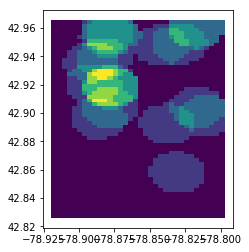

In [196]:
grid.plot(column='number_options_produce')
plt.show()

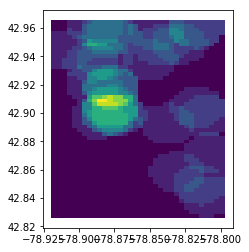

In [197]:
grid.plot(column='number_options')
plt.show()

In [180]:
grid.head()

,my_value,geometry,centroid,number_options,number_options_produce
0,4,"POLYGON ((-78.919453 42.826039, -78.919453 42....",POINT (-78.91765636943175 42.82735665851042),0,0
1,1,"POLYGON ((-78.919453 42.82867431702084, -78.91...",POINT (-78.91765636943175 42.82999191935585),0,0
2,3,"POLYGON ((-78.919453 42.83130952169087, -78.91...",POINT (-78.91765636943177 42.83262706785007),0,0
3,1,"POLYGON ((-78.919453 42.83394461400928, -78.91...",POINT (-78.91765636943177 42.83526210399228),0,0
4,5,"POLYGON ((-78.919453 42.83657959397529, -78.91...",POINT (-78.91765636943175 42.8378970277817),0,0


In [182]:
grid[['geometry', 'number_options', 'number_options_produce']].to_file('../data/processed/food_index.geojson', driver='GeoJSON')

In [199]:
buffalo = gpd.read_file('../data/raw/buffalo_municipal_boundary.geojson')

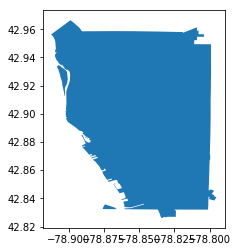

In [200]:
buffalo.plot()

In [219]:
import os
cwd = os.getcwd()
print(cwd)

/Users/andrew/Documents/personal/food_desert_proto/src


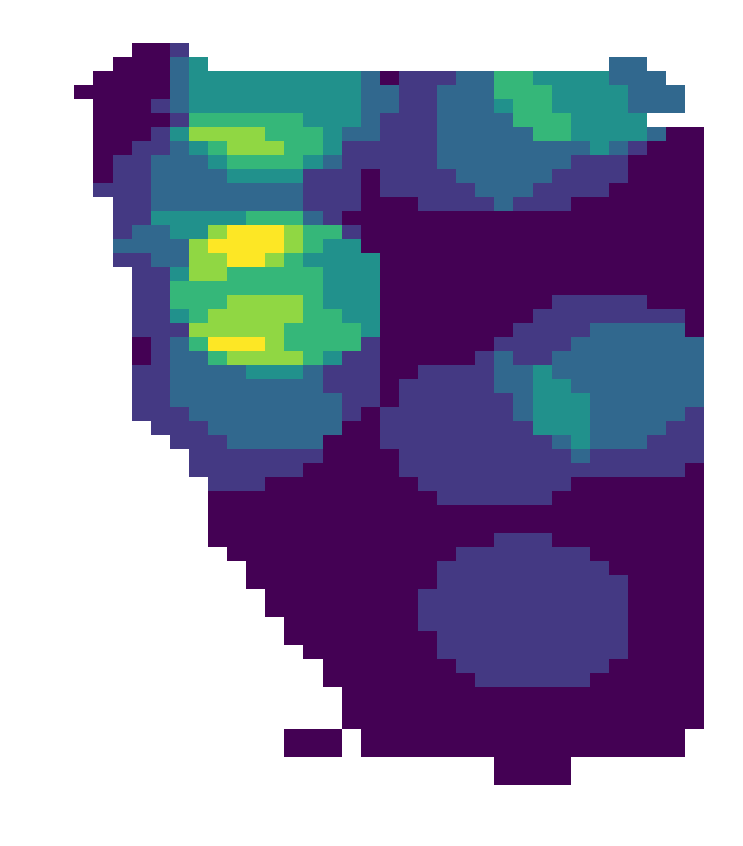

In [220]:
# cities_with_country = geopandas.sjoin(cities, countries, how="inner", op='intersects')
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')
ax.axis('off')
gpd.sjoin(grid, buffalo, how='inner', op='intersects').plot(column='number_options_produce', ax=ax)

filepath = '../img/map'
plt.savefig(filepath, dpi=300)

In [205]:
trimmed_grid = gpd.sjoin(grid, buffalo, how='inner', op='intersects')

In [207]:
trimmed_grid[['geometry', 'number_options', 'number_options_produce']].to_file('../data/processed/food_index_trimmed.geojson', driver='GeoJSON')